In [1]:
import os
os.chdir("Desktop/Financial forecasting")
os.getcwd()

'C:\\Users\\admin\\Desktop\\Financial forecasting'

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
training_data="train.csv"
test_data="test.csv"
train=pd.read_csv(training_data)
test=pd.read_csv(test_data)

In [3]:
train.describe()

,Index,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
count,623817.000000,623817.000000,623817.000000,623817.000000,6.238170e+05,623762.000000,623812.000000,6.238170e+05,6.238170e+05,623817.000000,623817.000000,623817.000000,623817.000000,6.238170e+05,623817.000000,623817.000000,623817.000000
mean,311908.000000,2.611854,343.908465,1504.311899,3.513422e+01,1.515302,0.975639,3.569196e-06,7.650938e-06,0.000013,0.000020,0.000033,0.001772,5.257464e-06,275.436028,0.000075,14.723355
std,180080.600774,0.816069,209.625123,874.545393,7.673634e+03,4.594337,2.498639,5.585191e-05,1.104701e-04,0.000196,0.000355,0.000583,0.002313,8.692817e-05,1799.850048,0.001047,24.390745
min,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000013,0.000313,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000005,0.000000e+00,1.000000,-0.071099,0.002797
25%,155954.000000,2.000000,161.000000,746.000000,2.038527e-03,0.701935,0.392679,2.262748e-07,6.104431e-07,0.000001,0.000002,0.000004,0.000544,1.501948e-07,100.000000,-0.000107,2.271488
50%,311908.000000,3.000000,334.000000,1508.000000,1.095818e-02,1.040783,0.625408,6.904246e-07,1.789302e-06,0.000003,0.000006,0.000010,0.001056,5.696645e-07,100.000000,0.000027,6.144597
75%,467862.000000,3.000000,518.000000,2264.000000,4.378452e-02,1.650996,0.992129,2.355756e-06,5.706755e-06,0.000010,0.000016,0.000027,0.002131,2.338320e-06,200.000000,0.000203,16.649687
max,623816.000000,4.000000,729.000000,3022.000000,4.998275e+06,2946.263900,677.912473,2.831509e-02,6.514162e-02,0.109440,0.206560,0.361169,0.102200,3.589258e-02,734914.404967,0.066617,694.001930


In [4]:
train.head(5)

,Index,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6,y,Weight
0,0,1,1,363,0.002696,0.530040,0.400810,1.300048e-06,4.639533e-06,1.073594e-05,2.180516e-05,4.416943e-05,0.002212,6.214737e-07,200.000000,-0.000196,1.533780
1,1,1,1,1223,0.081093,1.366218,1.325157,1.656861e-05,3.024668e-05,5.261872e-05,4.193762e-05,4.193762e-05,0.010932,3.414868e-05,300.000000,-0.003798,0.843604
2,2,1,1,1372,0.009561,0.464871,0.328008,6.500872e-08,2.323204e-07,5.182686e-07,1.080834e-06,2.030442e-06,0.000306,4.079460e-08,159.692076,-0.000003,29.824024
3,3,1,1,1942,0.045300,0.608222,0.456662,1.928694e-08,6.495275e-08,1.338509e-07,2.644214e-07,6.980798e-07,0.000205,9.502066e-09,212.160378,-0.000008,100.388668
4,4,1,1,2712,0.001605,0.476718,0.205069,6.759866e-07,2.638783e-06,6.424519e-06,1.189923e-05,2.064450e-05,0.001525,3.428403e-07,153.724351,0.000065,5.950714


In [5]:
test.head()

,Index,Market,Day,Stock,x0,x1,x2,x3A,x3B,x3C,x3D,x3E,x4,x5,x6
0,0,1,13,363,0.000842,0.436594,0.477848,1.535381e-06,4.353950e-06,7.718616e-06,1.632886e-05,3.267851e-05,0.001661,9.724611e-07,112.968475
1,1,1,13,1223,0.020800,0.636143,0.670798,5.204133e-06,9.546012e-06,1.575258e-05,2.804666e-05,1.082500e-05,0.002104,2.146299e-05,100.000000
2,2,1,13,1372,0.068580,0.478891,0.481816,5.433730e-08,1.733539e-07,3.866963e-07,8.520664e-07,2.103176e-06,0.000222,3.085296e-08,188.335508
3,3,1,13,1942,0.011986,0.463201,0.294900,1.103215e-08,3.555558e-08,7.280376e-08,1.364231e-07,3.155050e-07,0.000141,1.678216e-08,212.123913
4,4,1,13,2712,0.000164,0.549980,0.352332,4.494670e-07,8.503405e-07,1.222847e-06,1.901114e-06,4.048304e-06,0.001235,4.595200e-07,124.024977


In [6]:
features=['x0','x1','x2','x3A','x3B','x3C','x3D','x3E','x4','x5','x6']
X=train[features]
y=train.y
Xtest=test[features]

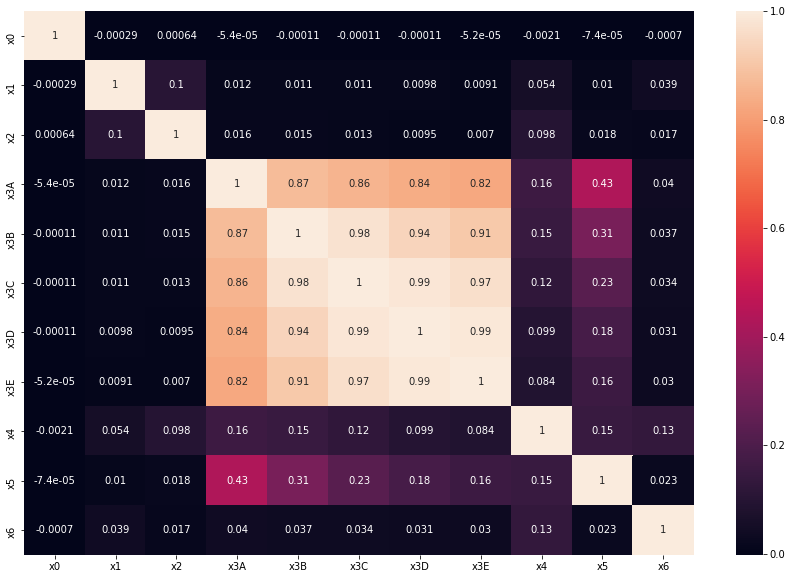

In [14]:
correlations=X.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlations,annot=True)
plt.show()

In [7]:
X.isnull().sum()

x0      0
x1     55
x2      5
x3A     0
x3B     0
x3C     0
x3D     0
x3E     0
x4      0
x5      0
x6      0
dtype: int64

In [8]:
pipeline=make_pipeline(Imputer(),GradientBoostingRegressor())#pipeline qui va imputer mes valeurs manquantes et ensuite appliquer
                                                            #le GradientBoosting a mes donnees

In [9]:
Xtrain,Xval,ytrain,yval=train_test_split(X,y,random_state=0)
pipeline.fit(Xtrain,ytrain)
y_pred_val=pipeline.predict(Xval)
y_pred_final=pipeline.predict(Xtest)
y_pred_val=pd.DataFrame(y_pred_val,columns=['y'])
y_pred_final=pd.DataFrame(y_pred_final,columns=['y'])

In [11]:
submission=pd.DataFrame({'Index':test.Index,'y':y_pred_final.y})
submission.to_csv("challenge_results.csv",index=False)

In [13]:
y_pred_final,y_pred_val=y_pred_final.align(y_pred_val,join='inner',axis=0)
print("Mean Squared Error =",mean_squared_error(y_pred_final,y_pred_val))

Mean Squared Error = 4.28800811204e-07
